# Hierarchical Clustering

In [1]:
#!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_file = "beer.csv"

In [5]:
beer_df = pd.read_csv( data_file )

In [6]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


## Scaling

#### Rescaling the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
x_features = ['calories', 'sodium', 'alcohol', 'cost']

In [9]:
scaler = MinMaxScaler()
scaled_beer_df = scaler.fit_transform( beer_df[x_features] )

## Understanding number of clusters using Using Dendrogram

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
agcluster = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

In [12]:
agcluster.fit(scaled_beer_df)

AgglomerativeClustering(n_clusters=5)

In [13]:
agcluster.labels_

array([4, 4, 0, 0, 2, 2, 2, 3, 3, 4, 3, 3, 0, 0, 1, 4, 2, 1, 3])

In [14]:
beer_df['agcl_id'] = agcluster.labels_

In [15]:
beer_df.sort_values('agcl_id', ascending = True)

,name,calories,sodium,alcohol,cost,agcl_id
2,Kronenbourg,170,7,5.2,0.73,0
3,Heineken,152,11,5.0,0.77,0
12,Becks,150,19,4.7,0.76,0
13,Kirin,149,6,5.0,0.79,0
17,Olympia_Goled_Light,72,6,2.9,0.46,1
14,Pabst_Extra_Light,68,15,2.3,0.38,1
16,Heilemans_Old_Style,144,24,4.9,0.43,2
4,Old_Milwaukee,145,23,4.6,0.28,2
5,Augsberger,175,24,5.5,0.40,2
6,Srohs_Bohemian_Style,149,27,4.7,0.42,2


In [16]:
scaled_beer_df = pd.DataFrame(scaled_beer_df, columns = x_features, index = beer_df.name)

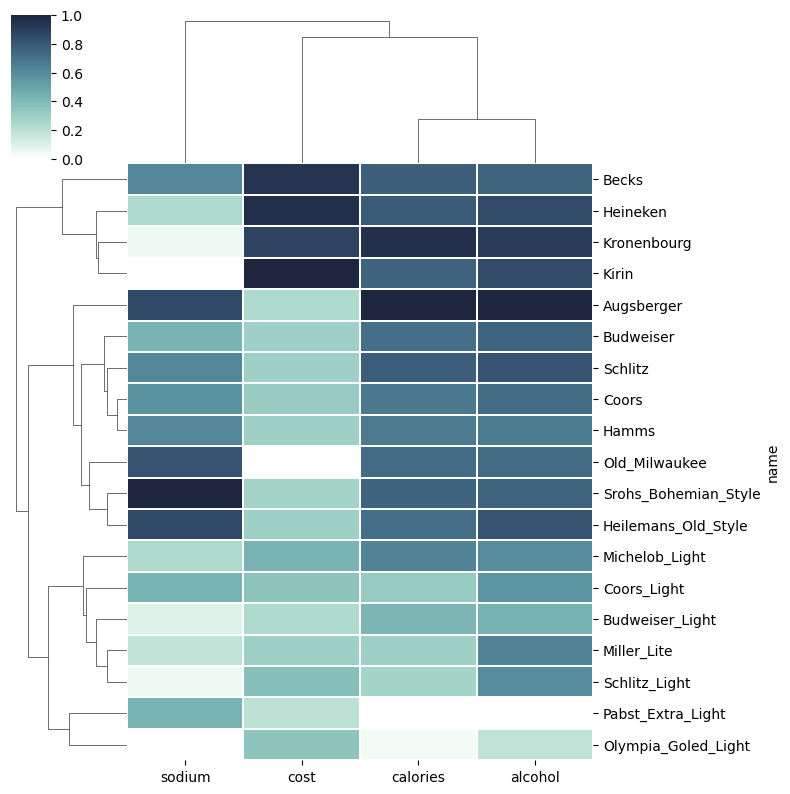

In [17]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df,
              cmap=cmap,
              linewidths=.2,
              figsize = (8,8));

## Density Based Clustering

In [18]:
from sklearn.cluster import HDBSCAN

In [19]:
hscan = HDBSCAN(min_cluster_size=2)

In [20]:
hscan.fit(scaled_beer_df[x_features])

HDBSCAN(min_cluster_size=2)

In [21]:
hscan.labels_

array([ 2,  2,  0,  0, -1, -1,  3,  1,  1,  2,  1, -1,  0,  0, -1,  2,  3,
       -1,  1])

In [22]:
#beer_df = beer_df.drop('agcl_id', axis = 1)

In [23]:
beer_df['hscan_cluster'] = hscan.labels_

In [24]:
beer_df[beer_df.hscan_cluster == 0]

,name,calories,sodium,alcohol,cost,agcl_id,hscan_cluster
2,Kronenbourg,170,7,5.2,0.73,0,0
3,Heineken,152,11,5.0,0.77,0,0
12,Becks,150,19,4.7,0.76,0,0
13,Kirin,149,6,5.0,0.79,0,0


In [25]:
beer_df[beer_df.hscan_cluster == 1]

,name,calories,sodium,alcohol,cost,agcl_id,hscan_cluster
7,Miller_Lite,99,10,4.3,0.43,3,1
8,Budweiser_Light,113,8,3.7,0.40,3,1
10,Coors_Light,102,15,4.1,0.46,3,1
18,Schlitz_Light,97,7,4.2,0.47,3,1


In [26]:
beer_df[beer_df.hscan_cluster == 2]

,name,calories,sodium,alcohol,cost,agcl_id,hscan_cluster
0,Budweiser,144,15,4.7,0.43,4,2
1,Schlitz,151,19,4.9,0.43,4,2
9,Coors,140,18,4.6,0.44,4,2
15,Hamms,139,19,4.4,0.43,4,2


In [27]:
beer_df[beer_df.hscan_cluster == 3]

,name,calories,sodium,alcohol,cost,agcl_id,hscan_cluster
6,Srohs_Bohemian_Style,149,27,4.7,0.42,2,3
16,Heilemans_Old_Style,144,24,4.9,0.43,2,3


In [28]:
beer_df[beer_df.hscan_cluster == -1]

,name,calories,sodium,alcohol,cost,agcl_id,hscan_cluster
4,Old_Milwaukee,145,23,4.6,0.28,2,-1
5,Augsberger,175,24,5.5,0.40,2,-1
11,Michelob_Light,135,11,4.2,0.50,3,-1
14,Pabst_Extra_Light,68,15,2.3,0.38,1,-1
17,Olympia_Goled_Light,72,6,2.9,0.46,1,-1
